In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the csv data into Dataframes

In [2]:
epl_matches_train = pd.read_csv('epl_matches_train.csv')
epl_matches_test = pd.read_csv('epl_matches_test.csv')
epl_players = pd.read_csv('epl_players.csv')
epl_teams = pd.read_csv('epl_teams.csv')
epl_goals = pd.read_csv('epl_goals.csv')
epl_potential_shots = pd.read_csv('epl_potential_shots.csv')

In [3]:
player_ids = list(epl_players.player_id.drop_duplicates()) # list of unique player id's

In [4]:
epl_players['birthday'] = pd.to_datetime(epl_players.birthday)
# the datatype of data is currently 'object', so pandas does not know that this column is a date
# we can convert it into a 'datetime' column using pd.to_datetime method

age = pd.Series(pd.DatetimeIndex(epl_players.birthday).year)

epl_players['age'] = 2014-age # age of the player as of the year 2014

epl_players['date'] = pd.to_datetime(epl_players.date) 

epl_players['year'] = pd.DatetimeIndex(epl_players.date).year # creating a column 'year' by using datetimeindex method

In [32]:
match_ids = list(epl_goals.match_id.drop_duplicates()) # list of unique match id's

epl_matches_train['date'] = pd.to_datetime(epl_matches_train.date) 

epl_matches_train['year'] = pd.DatetimeIndex(epl_matches_train.date).year

dict_id_year = {} # creating a dictionary to store to store the match id's and the corresponding year in which it took place

for i in match_ids:
    dict_id_year[i]=list(epl_matches_train[epl_matches_train.match_id==i].year)
    
year = [] 

for i in epl_goals['match_id']:
    year.append(dict_id_year[i][0])
    
epl_goals['year'] = year # creating a column 'year' to indicate the year in which the match took place and the goal was scored

epl_goals_12_13 = epl_goals[(epl_goals['year']<2014) ] # filtering the data for the years before 2013

In [33]:
def evaluate_abilities(player_id):
    
    '''input : player_id 
    
       returns a dictionary which contains variables that is used to asses a player 
    '''
    
    df = epl_players[epl_players['player_id']==player_id]  # filtering based on player's id
    
    df = df[(df['year']<2014)]       # only considering player's performance before 2014
    
    df = df.loc[:,'crossing':'age'].mean()                 # taking the average performance of a player during theperiod mentioned
    
    df['player_id']= player_id                             # creating a playerId column
    
    df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player 
    
    df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
    
    df = df.to_dict() # convering to dictionary
    
    return df

In [34]:
df = [] 

for i in player_ids:
    df.append(evaluate_abilities(i))
    
df = pd.DataFrame(df) # dataframe consisting of players and their performance 

df = df.sort_values('player_id')

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: B

<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['assists'] = epl_goals_12_13[epl_goals.player2_id == player_id].goal_number.sum()      # no. of assists by the player
<ipython-input-33-7dc5ca9e19dd>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df['goals_scored'] = epl_goals_12_13[epl_goals.player1_id == player_id].goal_number.sum() # no. of goals scored by the player
<ipython-input-33-7dc5ca9e19dd>:18: UserWarning: B

In [35]:
# creating a list of remaining attributes to be considered 

attributes_list = ['player_id','blocked_shot','header','shot','distance','direct_freekick','deflected','volley','bicycle_kick',
                          'big chance shot','big chance header','indirect freekick','big chance volley','big chance blocked',
                           'big chance bicycle','lob','blocked_header']

count = {}

l = [] # list of dictionaries consisting of player id's and the performance based on above attributes

p1_id = list(epl_potential_shots.player1_id.drop_duplicates()) # creating a list of unique  player id's present in epl_potential_shots

pid = list(set(player_ids).intersection(p1_id)) 

for i in pid:
    
    d = list(epl_potential_shots[(epl_potential_shots['player1_id']==i)].shot_type)
    
    count['player_id'] = i
    
    for j in d:
        if j not in count:
            count[j]=1
        else:
            count[j]+=1
    for att in attributes_list:
        if att not in count:
            count[att] = 0
    l.append(count)
    count={}
    
leftout_id = list(set(player_ids)^set(pid))

for i in sorted(leftout_id):
    for j in attributes_list:
        count[j]=0
    count['player_id']=i
    l.append(count)
    count={}

In [36]:
df2 = pd.DataFrame(l) # converting the list l to dataframe
df2 = df2.loc[:,'player_id':'blocked_header']
df2 = df2.sort_values('player_id') 

In [37]:
merged_df = df.merge(df2, on ='player_id') # merging the two dataframes namely df and df2
cols = merged_df.columns.to_list()
cols = [cols[34]] +cols[:34]+cols[35:]
merged_df= merged_df[cols]
merged_df 

,player_id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,deflected,bicycle_kick,big chance shot,big chance header,indirect freekick,big chance volley,big chance blocked,big chance bicycle,lob,blocked_header
0,2802.0,77.733333,73.400000,57.000000,72.400000,69.800000,82.200000,78.733333,75.066667,69.866667,...,0,0,1,0,0,1,0,0,0,0
1,3512.0,71.384615,57.615385,42.153846,66.846154,67.384615,72.615385,65.076923,61.846154,64.384615,...,0,0,0,0,0,0,0,0,0,0
2,3520.0,78.000000,78.882353,48.647059,82.941176,78.294118,87.588235,74.823529,73.470588,76.470588,...,11,1,1,0,0,0,0,0,0,0
3,8922.0,46.166667,77.777778,75.388889,57.555556,69.944444,68.888889,64.000000,63.722222,40.777778,...,1,0,10,4,0,0,1,0,0,2
4,8985.0,57.437500,54.937500,67.187500,68.375000,65.625000,54.562500,33.750000,67.250000,66.125000,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,693138.0,36.000000,30.000000,63.000000,39.000000,37.000000,33.000000,32.000000,37.000000,36.000000,...,0,0,0,0,0,0,0,0,0,0
1393,696365.0,41.000000,65.000000,61.000000,49.000000,51.000000,64.000000,46.000000,35.000000,38.000000,...,0,0,0,0,0,0,0,0,0,0
1394,706985.0,48.000000,44.000000,61.000000,60.000000,43.000000,59.000000,45.000000,48.000000,56.000000,...,0,0,0,0,0,0,0,0,0,0
1395,742405.0,40.000000,32.000000,50.000000,55.000000,40.000000,48.000000,38.000000,38.000000,55.000000,...,0,0,0,0,0,0,0,0,0,0


In [38]:
filtered_df = merged_df.dropna() # dropping the rows with NaN values

In [39]:
filtered_df

,player_id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,deflected,bicycle_kick,big chance shot,big chance header,indirect freekick,big chance volley,big chance blocked,big chance bicycle,lob,blocked_header
0,2802.0,77.733333,73.400000,57.000000,72.400000,69.800000,82.200000,78.733333,75.066667,69.866667,...,0,0,1,0,0,1,0,0,0,0
1,3512.0,71.384615,57.615385,42.153846,66.846154,67.384615,72.615385,65.076923,61.846154,64.384615,...,0,0,0,0,0,0,0,0,0,0
2,3520.0,78.000000,78.882353,48.647059,82.941176,78.294118,87.588235,74.823529,73.470588,76.470588,...,11,1,1,0,0,0,0,0,0,0
3,8922.0,46.166667,77.777778,75.388889,57.555556,69.944444,68.888889,64.000000,63.722222,40.777778,...,1,0,10,4,0,0,1,0,0,2
4,8985.0,57.437500,54.937500,67.187500,68.375000,65.625000,54.562500,33.750000,67.250000,66.125000,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1392,693138.0,36.000000,30.000000,63.000000,39.000000,37.000000,33.000000,32.000000,37.000000,36.000000,...,0,0,0,0,0,0,0,0,0,0
1393,696365.0,41.000000,65.000000,61.000000,49.000000,51.000000,64.000000,46.000000,35.000000,38.000000,...,0,0,0,0,0,0,0,0,0,0
1394,706985.0,48.000000,44.000000,61.000000,60.000000,43.000000,59.000000,45.000000,48.000000,56.000000,...,0,0,0,0,0,0,0,0,0,0
1395,742405.0,40.000000,32.000000,50.000000,55.000000,40.000000,48.000000,38.000000,38.000000,55.000000,...,0,0,0,0,0,0,0,0,0,0


In [40]:
matrix = filtered_df.loc[:,'crossing':].to_numpy() # converting the dataframe to a numpy array to perform computations

In [41]:
mean = matrix.mean(axis=0) # mean of the individual columns

In [42]:
sigma = matrix.std(axis=0) # standard deviation of the individual columns

In [43]:
normalized_matrix = (matrix - mean)/sigma # normalizing the matrix in order to scale the magnitude to each attribute and put them on equal footing

In [44]:
filtered_df.columns 

Index(['player_id', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes', 'age', 'goals_scored', 'assists', 'distance',
       'blocked_shot', 'shot', 'volley', 'direct_freekick', 'header',
       'deflected', 'bicycle_kick', 'big chance shot', 'big chance header',
       'indirect freekick', 'big chance volley', 'big chance blocked',
       'big chance bicycle', 'lob', 'blocked_header'],
      dtype='object')

In [45]:
weight_vector = np.ones(52) # initializing a weight vector used to assign 'influence' for each attribute

In [46]:
weight_vector[:33] = [0.7,0.9,0.8,0.7,0.8,0.9,0.6,0.7,0.8,0.9,0.7,0.7,0.6,0.5,0.6,0.8,0.7,0.8,0.6,0.8,0.5,0.7,0.7,0.8,0.6,0.8,0.8,0.9,0.9,0.6,0.5,0.7,0.9]
weight_vector[33:] = [-0.3,0.9,0.7,0.7,0.3,0.5,0.7,0.7,0.6,0.3,0.7,0.3,0.2,0.5,0.4,-0.7,0.6,0.5,0.3] 
# choosing weights for certain attributes such that we avoid bias towards certain positions of a player

In [47]:
output = weight_vector@normalized_matrix.T

In [48]:
soln = output.argsort()[::-1] # sorting the output in decreasing order of their value and returning their respective indices

In [49]:
most_valuable_players_10 = []
for i in soln[:10]:
    most_valuable_players_10.append(filtered_df.iloc[i,0])

In [50]:
most_valuable_players_10

[30829.0,
 30843.0,
 30631.0,
 40636.0,
 30618.0,
 23933.0,
 24372.0,
 30822.0,
 31921.0,
 27430.0]

In [51]:
least_valuable_players_10 = []
for i in soln[-10:][::-1]:
    least_valuable_players_10.append(filtered_df.iloc[i,0])

In [52]:
least_valuable_players_10

[188971.0,
 190142.0,
 214748.0,
 155936.0,
 157303.0,
 254472.0,
 163604.0,
 127712.0,
 50065.0,
 289159.0]

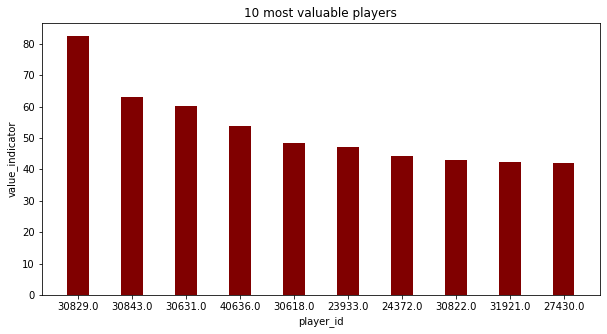

In [53]:
value_indicator1 = output[soln[:10]]  # the higher the value the most valuable the player is
fig = plt.figure(figsize = (10, 5))
plt.bar(list(map(str,most_valuable_players_10)),value_indicator1, color ='maroon',
        width = 0.4)
plt.xlabel("player_id")
plt.ylabel("value_indicator")
plt.title("10 most valuable players")
plt.show()

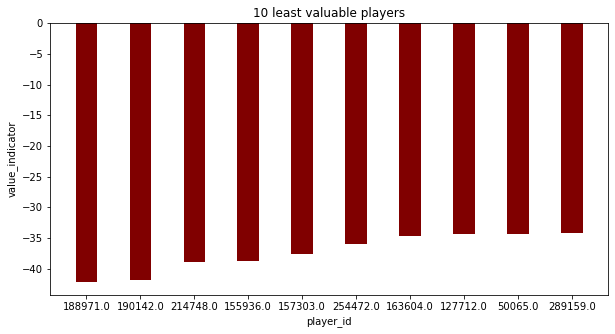

In [54]:
value_indicator2 = output[soln[-10:][::-1]] # the higher the negative value the least valuable the player is
fig = plt.figure(figsize = (10, 5))
plt.bar(list(map(str,least_valuable_players_10)),value_indicator2, color ='maroon',
        width = 0.4)
plt.xlabel("player_id")
plt.ylabel("value_indicator")
plt.title("10 least valuable players")
plt.show() 

In [55]:
mlvp_10 = {'most valuable players':most_valuable_players_10,'least valuable players':least_valuable_players_10}
mlvp_10 = pd.DataFrame(mlvp_10)
mlvp_10 = mlvp_10[['most valuable players','least valuable players']]
mlvp_10.to_csv('player_list_submission.csv')